In [14]:
from training.pretrained_bert import PretrainedBert
from training.pretrained_distil_bert import PretrainedDistilBert
from tests.similarity import item_comparison
from comparison.product_comparator import ProductComparator
from preprocessing.dataset_loader import PletsDataset
import numpy as np
from torch.utils.data import DataLoader
from evaluation.hierarchial_metric import HierachialMetric
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Demonstration of raw embedding comparison
Results of running the product comparison algorithm on abstract test.   
This part only uses the last two steps of the pipeline, that is embedding generation (in this case, based on a pretrained model) and embedding similarity calculation.  
Both the value of similarity metric and the execution time will be measured.

### Bert

In [15]:
model = ProductComparator(PretrainedBert().train())
item_comparison(model, "Red apple", "Green apple")
item_comparison(model, "Red apple", "Lemon")
item_comparison(model, "Red apple", "Brick")
item_comparison(model, "Red apple", "Warsaw University of Technology")

######## Comparison ########
# Red apple                #
# Green apple              #
############################
# Similarity: 0.99615      #
# Execution time: 36.74ms  #
############################

######## Comparison ########
# Red apple                #
# Lemon                    #
############################
# Similarity: 0.98853      #
# Execution time: 36.37ms  #
############################

######## Comparison ########
# Red apple                #
# Brick                    #
############################
# Similarity: 0.98222      #
# Execution time: 36.72ms  #
############################

############ Comparison ############
# Red apple                        #
# Warsaw University of Technology  #
####################################
# Similarity: 0.96787              #
# Execution time: 36.10ms          #
####################################



### DistilBert

In [16]:
model = ProductComparator(PretrainedDistilBert().train())
item_comparison(model, "Red apple", "Green apple")
item_comparison(model, "Red apple", "Lemon")
item_comparison(model, "Red apple", "Brick")
item_comparison(model, "Red apple", "Warsaw University of Technology")

######## Comparison ########
# Red apple                #
# Green apple              #
############################
# Similarity: 0.99838      #
# Execution time: 18.22ms  #
############################

######## Comparison ########
# Red apple                #
# Lemon                    #
############################
# Similarity: 0.99120      #
# Execution time: 17.93ms  #
############################

######## Comparison ########
# Red apple                #
# Brick                    #
############################
# Similarity: 0.99088      #
# Execution time: 17.83ms  #
############################

############ Comparison ############
# Red apple                        #
# Warsaw University of Technology  #
####################################
# Similarity: 0.97690              #
# Execution time: 18.35ms          #
####################################



...info about results, explanation what happened, times and so on

## Demonstration of feature extraction
...using the preprocessed dataset

In [17]:
dataset = DataLoader(PletsDataset("./../data", "train_preprocessed"), batch_size=5)
for c, i in enumerate(dataset):
    example = np.array(i).transpose()[0]
    print("[BASE]")
    print(example[0])
    print("\n[SIMILAR]")
    print(example[1])
    print("\n[DIFFERENT]")
    print(example[2])
    if c == 2:
        break
    print("\n"+"#"*100+"\n")

[BASE]
"Intel Xeon 5130 DL140 G3 2.0GHz Quad-Core Processor - 4MB Cache, 65W TDP, Full Processor Option Kit - Part Number: 417772 B21"

This representation includes the following relevant features and attributes:

* Brand: Intel
* Model: Xeon 5130
* Speed: 2.0GHz
* Cores: Quad-core
* Cache: 4MB
* Thermal Design Power (TDP): 65W
* Processor Type: Full Processor Option Kit
* Part Number: 417772 B21

[SIMILAR]
"Intel Xeon 5130 2GHz 4MB L2 Processor - HP

* Intel Xeon 5000 sequence
* 2 GHz processor frequency
* LGA 771 socket J
* 65nm 64-bit technology
* 291M transistors
* 143mm processing die size
* Thermal Design Power (TDP): 65W
* Supports Intel Virtualization Technology (VT)
* Enhanced Intel SpeedStep Technology
* Execute Disable Bit
* Idle States: C0, C1, C2...
* On-die digital thermal sensor
* Protective thermal management features

[DIFFERENT]
"Intel Xeon L5335 DL140 G3 2.0GHz 4-Core 8MB 80W Full Processor Option Kit - Part Number: 453475 B21"

This representation includes the follo

## Metric demonstration
...

In [18]:
presets = [
    [1, 0.75, 0.5, 0.25, 0],
    [1, 0.95, 0.9, 0.85, 0.8],
    [1, 0.999, 0.998, 0.997, 0.996],
    [1, 1, 1, 1, 1],
    [1, 0.75, 0.9, 0.25, 0],
    [0, 0.25, 0.5, 0.75, 1],
    [1, 0, 1, 0, 1],
    [0, 0, 1, 0, 1],
    [1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1]
]
metric = HierachialMetric()
for preset in presets:
    print(f"Pairwise similarities: {preset}, metric value: {metric.evaluate_similarities(preset)}")

Pairwise similarities: [1, 0.75, 0.5, 0.25, 0], metric value: 1.0
Pairwise similarities: [1, 0.95, 0.9, 0.85, 0.8], metric value: 0.88
Pairwise similarities: [1, 0.999, 0.998, 0.997, 0.996], metric value: 0.813997
Pairwise similarities: [1, 1, 1, 1, 1], metric value: 0.3125
Pairwise similarities: [1, 0.75, 0.9, 0.25, 0], metric value: 0.9339999999999999
Pairwise similarities: [0, 0.25, 0.5, 0.75, 1], metric value: 0.25
Pairwise similarities: [1, 0, 1, 0, 1], metric value: 0.4625
Pairwise similarities: [0, 0, 1, 0, 1], metric value: 0.26250000000000007
Pairwise similarities: [1, 0, 0, 0, 0], metric value: 0.6125
Pairwise similarities: [0, 1, 0, 0, 0], metric value: 0.5125
Pairwise similarities: [0, 0, 0, 0, 1], metric value: 0.21250000000000005


## Full pipeline demonstration
...

## Ablation study - model architecture, training procedure
...

In [25]:
models = {
    "Raw BERT": PretrainedBert(),
    "Raw DistilBERT": PretrainedDistilBert()
}
train_dataset = DataLoader(PletsDataset("./../data", "train_preprocessed"), batch_size=5)
test_dataset = DataLoader(PletsDataset("./../data", "test_preprocessed"))
metric = HierachialMetric()

df = pd.DataFrame(columns=["model", "score"])
for label, model in models.items():
    comparator = ProductComparator(model.train(train_dataset))
    score = metric.evaluate_dataset(comparator, test_dataset, limit=15)
    df.loc[len(df)] = [label, score]

 93%|█████████▎| 14/15 [00:04<00:00,  3.44it/s]


            model     score
0        Raw BERT  0.726471
1  Raw DistilBERT  0.711047


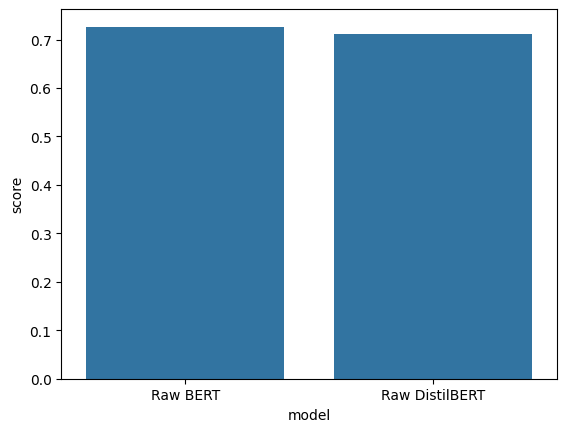

In [20]:
print(df)
sns.barplot(x="model", y="score", data=df)
plt.show()